# Importing neccessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [4]:
import os
data_dir = 'Malaria-dataset'

train_path = data_dir+'\\train'
test_path = data_dir+'\\test'

os.listdir(train_path), os.listdir(train_path+'\\parasitized')[0], os.listdir(train_path+'\\uninfected')[1]

(['parasitized', 'uninfected'],
 'C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_131.png')

# Displaying Uninfected and Infected Cell tissues

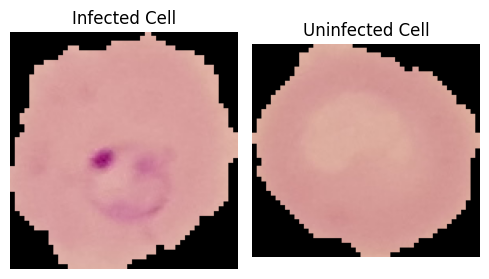

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define the paths to the images
infected = train_path + '\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'
uninfected = train_path + '\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_131.png'

# Read the images
infected_image = imread(infected)
uninfected_image = imread(uninfected)

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(5, 3))  # Adjust figsize as needed

# Display the infected image
axes[0].imshow(infected_image)
axes[0].set_title('Infected Cell')  # Set title for the infected cell
axes[0].axis('off')  # Hide the axis

# Display the uninfected image
axes[1].imshow(uninfected_image)
axes[1].set_title('Uninfected Cell')  # Set title for the uninfected cell
axes[1].axis('off')  # Hide the axis

# Show the plot
plt.tight_layout()  # Adjusts subplot params to give specified padding
plt.show()

In [6]:
width = 128
height = 128

# Dividing Dataset into two folders train and test

In [7]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Preparing train and test Image Generator

In [8]:
trainDatagen = datagen.flow_from_directory(directory=train_path,
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 19968 images belonging to 2 classes.


In [53]:
trainDatagen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [9]:
valDatagen = datagen.flow_from_directory(directory=test_path,
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation',
                                           shuffle=False)

Found 520 images belonging to 2 classes.


# Preparing the model

In [10]:
from tensorflow import keras
model = keras.models.Sequential([
keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = [128,128,3], padding='same'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, (2, 2), activation='relu', padding='same'),
keras.layers.MaxPooling2D(),

keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPooling2D(),

keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPooling2D(),
keras.layers.Dropout(0.2),

keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPooling2D(),
keras.layers.Dropout(0.2),

keras.layers.Flatten(),

keras.layers.Dense(512, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.7),

keras.layers.Dense(128, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.5),

keras.layers.Dense(64, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.3),

keras.layers.Dense(1, activation ='sigmoid')])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 separable_conv2d (Separabl  (None, 32, 32, 64)        2400      
 eConv2D)                                                        
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
callbacks = [early_stopping, reduce_lr]

In [14]:
history = model.fit(trainDatagen,
                    epochs =15,
                    validation_data = valDatagen,
                    callbacks=callbacks, 
                    batch_size=128)

Epoch 1/15


1248/1248 [==============================] - 228s 179ms/step - loss: 0.4067 - accuracy: 0.8191 - val_loss: 0.2472 - val_accuracy: 0.9346 - lr: 0.0010
Epoch 2/15
1248/1248 [==============================] - 114s 91ms/step - loss: 0.1867 - accuracy: 0.9462 - val_loss: 0.2205 - val_accuracy: 0.9346 - lr: 0.0010
Epoch 3/15
1248/1248 [==============================] - 123s 98ms/step - loss: 0.1809 - accuracy: 0.9495 - val_loss: 0.1940 - val_accuracy: 0.9346 - lr: 0.0010
Epoch 4/15
1248/1248 [==============================] - 126s 101ms/step - loss: 0.1707 - accuracy: 0.9514 - val_loss: 0.2039 - val_accuracy: 0.9365 - lr: 0.0010
Epoch 5/15
1248/1248 [==============================] - 116s 93ms/step - loss: 0.1692 - accuracy: 0.9533 - val_loss: 0.2253 - val_accuracy: 0.9308 - lr: 0.0010


In [23]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

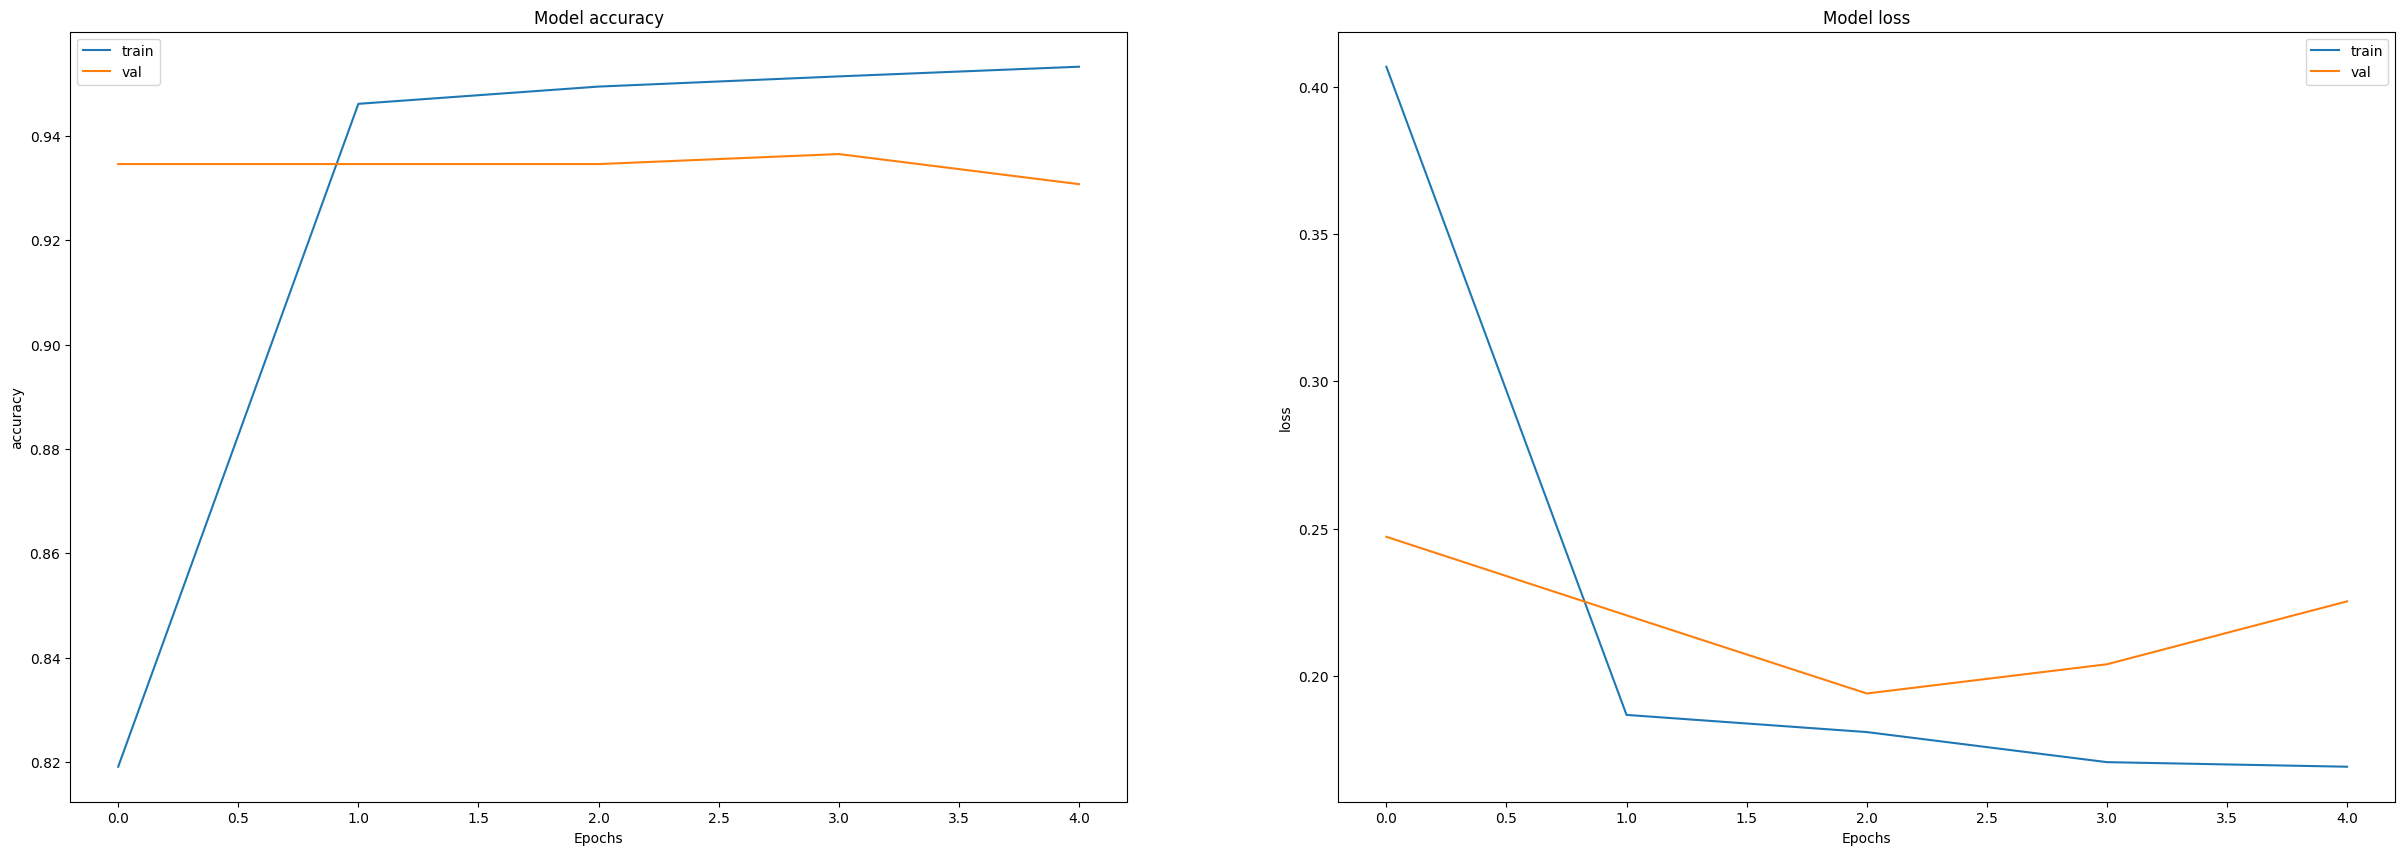

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [24]:
model.evaluate(valDatagen)

33/33 [==============================] - 1s 33ms/step - loss: 0.2253 - accuracy: 0.9308


[0.22528031468391418, 0.9307692050933838]

In [25]:
# df = pd.DataFrame(history.history)
# df.to_csv("Malaria-CNN.csv")

In [27]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
preds = model.predict(valDatagen)
y_pred = tf.where(preds<=0.5,0,1)
y_true = valDatagen.labels
print(classification_report(y_true,y_pred))

33/33 [==============================] - 1s 33ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       260
           1       0.93      0.93      0.93       260

    accuracy                           0.93       520
   macro avg       0.93      0.93      0.93       520
weighted avg       0.93      0.93      0.93       520



In [39]:
z = 0
o = 0
for item in preds:
    if item < 0.5:
        z+=1
    else:
        o+=1
z,o

(262, 258)

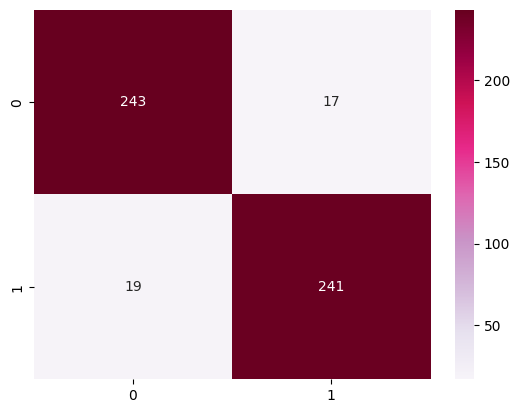

In [20]:
import seaborn as sns
cnf = confusion_matrix(y_true,y_pred)
sns.heatmap(cnf, annot=True,fmt='g', cmap="PuRd")
plt.savefig("CNN-Confusion matrix.png")
plt.show()

# Save and load the model

In [41]:
model.save('malaria_classification.keras')

In [46]:
from tensorflow.keras.models import load_model

model = load_model("malaria_classification.keras")

In [50]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the parasitized image
img = image.load_img(train_path + '\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png', target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

predictions = model.predict(img_array)
print(predictions)  # Output should be between 0 and 1

# Load the uninfected image
img = image.load_img(train_path + '\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_131.png', target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

predictions = model.predict(img_array)
print(predictions)  # Output should be between 0 and 1

1/1 [==============================] - 0s 47ms/step
[[0.00563032]]
1/1 [==============================] - 0s 33ms/step
[[0.9733457]]


# Specificity and sensitivity of CNN

In [21]:
tp = 2542
fp = 213
tn = 2684 
fn = 71
sensitivity = tp/(tp+fn)
print(sensitivity)
specificity = tn/(tn+fp)
print(specificity)

0.9728281668580177
0.9264756644804971


In [22]:
XX

NameError: name 'XXX' is not defined

# VGG16 Model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [ ]:
vgg = VGG16(input_shape=(128,128,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(1, activation='sigmoid')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

In [ ]:
METRICS = ['accuracy']

In [ ]:
modelvgg.compile(optimizer='adam',
              loss=['binary_crossentropy'],
              metrics=METRICS)

In [ ]:
history = modelvgg.fit(trainDatagen,
                    epochs =50,
                    validation_data = valDatagen,
                    callbacks=callbacks, 
                    batch_size=128)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
modelvgg.evaluate_generator(valDatagen)

In [ ]:
df = pd.DataFrame(history.history)

In [ ]:
# df.to_csv("Malaria-VGG.csv")

# Perfromance

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
preds = modelvgg.predict_generator(valDatagen)
y_pred = tf.where(preds<=0.5,0,1)


In [ ]:
y_true = valDatagen.labels
print(classification_report(y_true,y_pred))

In [ ]:
import seaborn as sns
cnf_vgg = confusion_matrix(y_true,y_pred)
sns.heatmap(cnf_vgg, annot=True,fmt='g',cmap="GnBu")
plt.savefig("VGG-Confusion matrix.png")
plt.show()

# Specificity and sensitivity of VGG16

In [ ]:
tp = 2631
fp = 124
tn = 2500 
fn = 255
sensitivity = tp/(tp+fn)
print(sensitivity)
specificity = tn/(tn+fp)
print(specificity)

In [ ]:
import os
os.system('uname -o')

In [ ]:
import sys
print(sys.platform)